In [17]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
import numpy as np

In [4]:
num_of_words = 20000
max_len = 100
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_of_words)

17473536/17464789 [==============================] - 13s 1us/step


In [37]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]])

In [15]:
n_feature = X_train.shape[1]

In [27]:
model = Sequential()
model.add(Embedding(input_dim=num_of_words, output_dim=128, input_shape=(n_feature,)))
model.add(LSTM(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [29]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, metrics=['accuracy'], loss=tf.keras.losses.binary_crossentropy)

In [30]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 171s 216ms/step - loss: 0.4355 - accuracy: 0.7940 - val_loss: 0.3496 - val_accuracy: 0.8456
Epoch 2/5
782/782 [==============================] - 169s 216ms/step - loss: 0.2629 - accuracy: 0.8930 - val_loss: 0.4138 - val_accuracy: 0.8252
Epoch 3/5
782/782 [==============================] - 171s 218ms/step - loss: 0.2026 - accuracy: 0.9204 - val_loss: 0.4241 - val_accuracy: 0.8325
Epoch 4/5
782/782 [==============================] - 173s 221ms/step - loss: 0.1686 - accuracy: 0.9359 - val_loss: 0.4547 - val_accuracy: 0.8290
Epoch 5/5
782/782 [==============================] - 185s 236ms/step - loss: 0.1449 - accuracy: 0.9459 - val_loss: 0.4837 - val_accuracy: 0.8215


In [31]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %.3f' % acc)

782/782 [==============================] - 42s 53ms/step - loss: 0.4837 - accuracy: 0.8215
Accuracy: 0.821


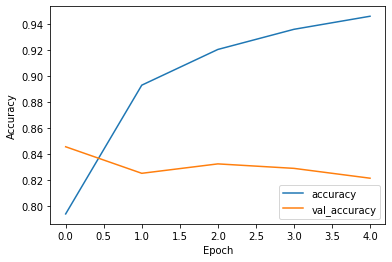

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')